### 1 dimension diffusion
$$ p(n,t+\Delta t)= p(n,t) + k \Delta t p(n-1,t) + k \Delta t p(n+1,t) - k \Delta t p(n,t) - k \Delta t p(n,t)$$

In [9]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# for those who are interested in generating interactive plots
import panel as pn
pn.extension()

In [2]:
# Specify the paraneters
n_boxes = 50

# Time steps
dt = 0.1

# Initial condition
p0 = 1

# Number of steps
n_steps = 100

# Hopping rate constant (k)
k = 1 # sec^-1

In [4]:
# Initialize probability distribution
p = np.zeros((n_boxes, n_steps))

# Specify the middle value
x0 = n_boxes // 2

# Specity initial condition
p[x0, 0] = p0

In [5]:
# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(1,n_steps):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t] = p[n,t-1] + k*dt*p[n-1,t-1] + k*dt*p[n+1,t-1] - 2*k*dt*p[n,t-1]

    # Boundary cases
    p[0,t] = p[0,t] + k*dt*p[1,t-1] - k*dt*p[0,t-1]
    
    # p[-1,t] chooses the last row and the t-th column
    p[-1, t] = p[-1, t-1] + k*dt*p[-2,t-1] - k*dt*p[-1, t-1]

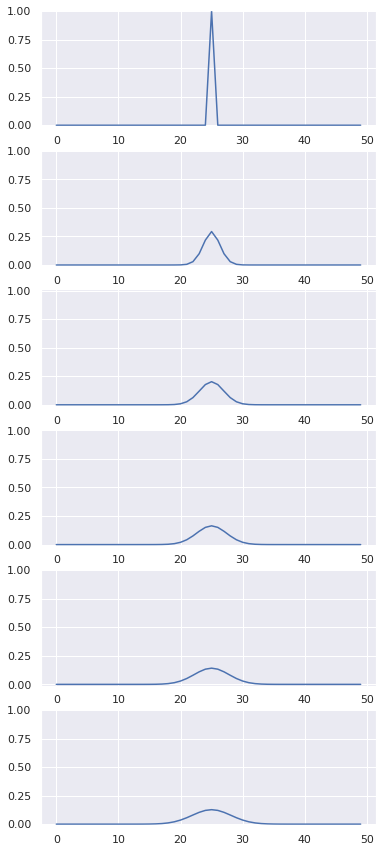

In [6]:
# define 6 rows of subplots in one column
fig, ax = plt.subplots(6,1, figsize=(6,15))

# plot every 10th probability distribution, : takes the whole row (all of space)
for n in range(len(ax)):
  ax[n].plot(p[:,10*n])
  # fix the y-limit to be the same for all plots
  ax[n].set_ylim([-0.01,1.01])

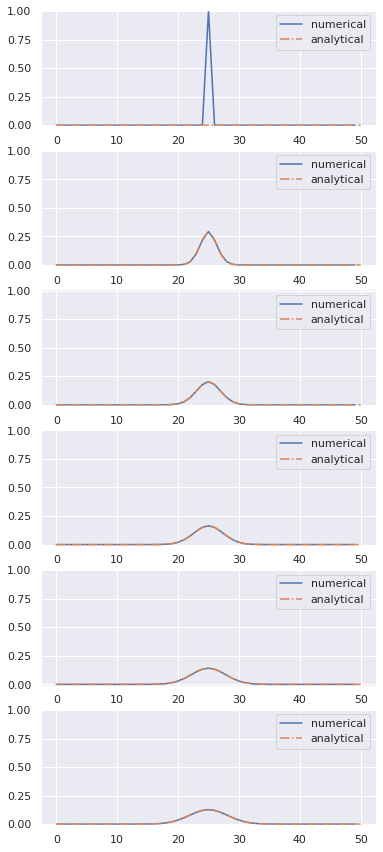

In [7]:
# Create a list of x values that smoothes our Gaussian curve
x = np.linspace(0, n_boxes, 100)

# Create a time array for our Gaussian that's slightly padded so we don't divide by 0
times = np.arange(0, n_steps) * dt + 0.001

# Define our diffusion constant
D = k

# Create our Gaussian as a function of space and time
gaussian = np.zeros((len(x), len(times)))

# Loop through time to produce our Gaussian
for nt, time in enumerate(times):
  exponential = - (x - x0)**2 / (4 * D * time)
  denominator = np.sqrt(4 * np.pi * D * time)
  gaussian[:,nt] = np.exp(exponential) / denominator

# Plot both the Gaussian curve and our analytical solution.
fig, ax = plt.subplots(6,1, figsize=(6,15))

for n in range(len(ax)):
  ax[n].plot(p[:,10*n], label='numerical')
  ax[n].plot(x, gaussian[:,10*n], '-.', label='analytical')
  ax[n].legend(loc=1)
  ax[n].set_ylim([-0.01,1.01])

Column
    [0] FloatSlider(end=99, name='time slider', step=1)
    [1] ParamFunction(function)
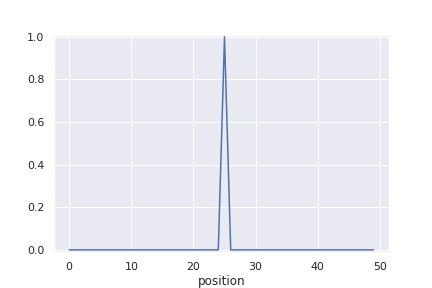

In [10]:
# Interactive plot of the probability distribution over time

time_slider = pn.widgets.FloatSlider(
    name='time slider',
    start=0,
    end=n_steps-1,
    step=1,
    value=0
)
@pn.depends(time_slider.param.value) # make a new plot when the parameters in frame_player change
def movie_player(frame):
    # Initialize plot
    fig, ax = plt.subplots(1,1) # Making one figure in our interactive plot
    # Generate plot of distribution
    ax.plot(p[:, frame])
    ax.set_xlabel('position')
    # Set height for all plots
    ax.set_ylim([-0.01, 1.01])
    plt.close(fig)
    return fig

pn.Column(time_slider,
          movie_player)

In [12]:
# Number of time steps
n_steps = 1000

# Time increment in seconds
dt = 0.2

# Initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# ---------- FRAP initialization ----------
# Assign non-zero values
p[:,0] = 1

# Photobleaching
start = n_boxes // 4
end = 3*n_boxes // 4
p[start:end,0] = 0

# Normalization
p[:,0] = p[:,0] / np.sum(p[:,0])

# ------------------------------------------

# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(n_steps - 1):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t+1] = p[n,t] + k*dt*p[n-1,t] + k*dt*p[n+1,t]  \
                          - 2*k*dt*p[n,t]

    # Boundary cases
    p[0,t+1] = p[0,t] + k*dt*p[1,t] - k*dt*p[0,t]
    p[-1, t+1] = p[-1, t] + k*dt*p[-2,t] - k*dt*p[-1, t]

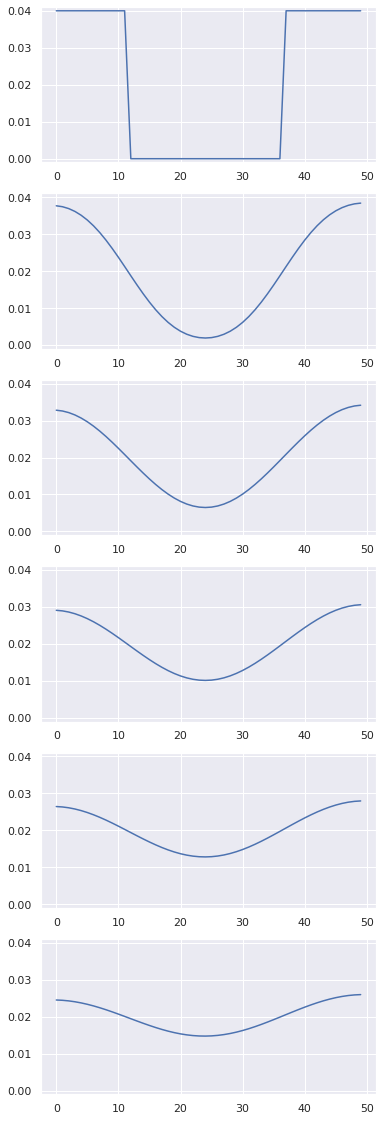

In [13]:
# Generate 6 rows of figures
fig, ax = plt.subplots(6, 1, figsize=(6,20))

# Plot probability distribution every 20 seconds
for n in range(len(ax)):
  ax[n].plot(p[:,100*n])

  # Fix the y limits
  ax[n].set_ylim(-0.001, 0.041)

Column
    [0] FloatSlider(end=999, name='time slider', step=1)
    [1] ParamFunction(function)
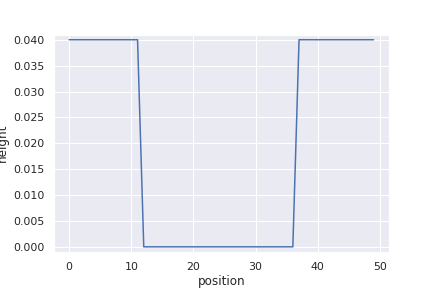

In [14]:
# Interactive plot of the probability distribution over time

time_slider = pn.widgets.FloatSlider(
    name='time slider',
    start=0,
    end=n_steps-1,
    step=1,
    value=0
)
@pn.depends(time_slider.param.value) # make a new plot when the parameters in frame_player change
def slider(frame):
    # Initialize plot
    fig, ax = plt.subplots(1,1) # Making one figure in our interactive plot
    # Generate plot of distribution
    ax.plot(p[:, frame])
    ax.set_xlabel('position')
    ax.set_ylabel('height')
    # Set height for all plots
    ax.set_ylim([-0.001, 0.041])
    plt.close(fig)
    return fig

pn.Column(time_slider,
          slider)